<h2> Models to Predict the Brain Size a Person </h2>

<b> By Michael Kumakech</b>

In [66]:
!pip install lxml

In [2]:
import requests
import lxml.html as lh
import pandas as pd

In [3]:
brainsize = 'https://github.com/mkumakech/students/blob/main/brainsize.csv' #assign the wiki page
#WHO_url = 'https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases'

page = requests.get(brainsize) # create a handle to for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 rows

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

<b> Check the table header</b>

In [4]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:
2:Gender
3:FSIQ
4:VIQ
5:PIQ
6:Weight
7:Height
8:MRI_Count


<b> Check the data in other Row</b>

In [5]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=8: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

<b> Check the numbers of rows and columns </b>

In [6]:
[len(C) for (title,C) in col]

[40, 40, 40, 40, 40, 40, 40, 40]

<b> We display the data frame</b>

In [7]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [8]:
df.head()

,,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,,Female,133,132,124,118,64.5,816932
1,,Male,140,150,124,NaN,72.5,1001121
2,,Male,139,123,150,143,73.3,1038437
3,,Male,133,129,128,172,68.8,965353
4,,Female,137,132,134,147,65,951545


In [9]:
df.tail()

,,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
35,,Female,133,129,128,153,66.5,948066
36,,Male,140,150,124,144,70.5,949395
37,,Female,88,86,94,139,64.5,893983
38,,Male,81,90,74,148,74,930016
39,,Male,89,91,89,179,75.5,935863


In [10]:
df.describe()

,,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40,40,40,40,40,40,40,40
unique,1,2,26,20,21,33,24,40
top,,Male,133,90,124,172,64.5,790619
freq,40,20,5,5,6,2,4,1


In [11]:
df.dtypes

             object
Gender       object
FSIQ         object
VIQ          object
PIQ          object
Weight       object
Height       object
MRI_Count    object
dtype: object

<h2> Identify and handle missing values</h2>

<b> Evaluationg the missing data</b>

In [12]:
import numpy as np

# replace "NaN" to NaN
df.replace("NaN", np.nan, inplace = True)
df.head(5)

,,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,,Female,133,132,124,118,64.5,816932
1,,Male,140,150,124,NaN,72.5,1001121
2,,Male,139,123,150,143,73.3,1038437
3,,Male,133,129,128,172,68.8,965353
4,,Female,137,132,134,147,65,951545


In [13]:
missing_data = df.isnull()
missing_data.head(5)

,,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [14]:
missing_data.tail()

,,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
35,False,False,False,False,False,False,False,False
36,False,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False,False
38,False,False,False,False,False,False,False,False
39,False,False,False,False,False,False,False,False


<b> Count missing values in each column</b>

In [80]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  


False    40
Name: , dtype: int64

Gender
False    40
Name: Gender, dtype: int64

FSIQ
False    40
Name: FSIQ, dtype: int64

VIQ
False    40
Name: VIQ, dtype: int64

PIQ
False    40
Name: PIQ, dtype: int64

Weight
False    38
True      2
Name: Weight, dtype: int64

Height
False    39
True      1
Name: Height, dtype: int64

MRI_Count
False    40
Name: MRI_Count, dtype: int64



<b> Based on the summary above, each column has 40 rows of data, seven columns containing missing data:</b>

1). Height has 1 missing vlaue.
2). Weight has 2 missing vlaues.

<b> Replace  the missing values by mean:</b>

<b> Calculate the average of the column</b>

In [15]:
avg_height = df["Height"].astype("float").mean(axis=0)
print("Average of Height:", avg_height)

Average of Height: 68.52564102564102


<b> Replace "NaN" by mean value in "Height" column</b>

In [16]:
df["Height"].replace(np.nan, avg_height, inplace=True)

<b> Calculate the mean value for 'Weight' column</b>

In [17]:
avg_weight=df['Weight'].astype('float').mean(axis=0)
print("Average of Weight:", avg_weight)

Average of Weight: 151.05263157894737


In [18]:
df["Weight"].replace(np.nan, avg_weight, inplace=True)

In [19]:
df.head()

,,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,,Female,133,132,124,118,64.5,816932
1,,Male,140,150,124,151.053,72.5,1001121
2,,Male,139,123,150,143,73.3,1038437
3,,Male,133,129,128,172,68.8,965353
4,,Female,137,132,134,147,65,951545


In [20]:
df.dtypes

             object
Gender       object
FSIQ         object
VIQ          object
PIQ          object
Weight       object
Height       object
MRI_Count    object
dtype: object

<b> Convert data types to proper format</b>

In [21]:
df[["FSIQ","VIQ","PIQ","Weight","Height","MRI_Count"]] = df[["FSIQ","VIQ","PIQ","Weight","Height","MRI_Count"]].astype("float")

In [22]:
df.dtypes

              object
Gender        object
FSIQ         float64
VIQ          float64
PIQ          float64
Weight       float64
Height       float64
MRI_Count    float64
dtype: object

In [23]:
df.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,40.000000,40.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,22.868574,3.943103,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.750000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,147.500000,68.250000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


<h2> Plot Scatter diagram</b>

<b> Separate the data</b>

In [ ]:
#Correlation for general


In [24]:
import numpy as np
import matplotlib.pyplot as plt

menDf = df[(df.Gender == 'Male')]
womenDf = df[(df.Gender == 'Female')]

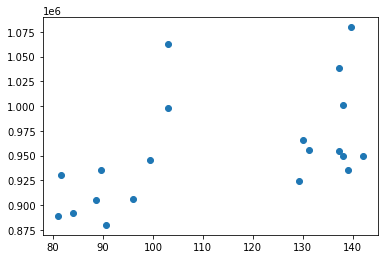

In [25]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

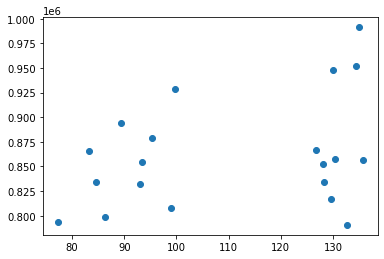

In [26]:
# Code cell 7
# SOLUTION:
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

plt.show()
%matplotlib inline

<h2> Calculating Correlation with Python</h2>

In [27]:
df.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.049590,-0.084175,0.357641
VIQ,0.946639,1.000000,0.778135,-0.071988,-0.069610,0.337478
PIQ,0.934125,0.778135,1.000000,0.002461,-0.075462,0.386817
Weight,-0.049590,-0.071988,0.002461,1.000000,0.690199,0.501977
Height,-0.084175,-0.069610,-0.075462,0.690199,1.000000,0.601308
MRI_Count,0.357641,0.337478,0.386817,0.501977,0.601308,1.000000


In [30]:
womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [31]:
menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.238744,-0.272669,0.498369
VIQ,0.944400,1.000000,0.766021,-0.311935,-0.273847,0.413105
PIQ,0.930694,0.766021,1.000000,-0.122908,-0.221510,0.568237
Weight,-0.238744,-0.311935,-0.122908,1.000000,0.404969,-0.058694
Height,-0.272669,-0.273847,-0.221510,0.404969,1.000000,0.337480
MRI_Count,0.498369,0.413105,0.568237,-0.058694,0.337480,1.000000


<h2> Part 4: Visualizing</h2>

In [50]:
!pip install seaborn

     |████████████████████████████████| 292 kB 4.8 MB/s            


<b> Plot the correlation heatmap.</b>

<AxesSubplot:>

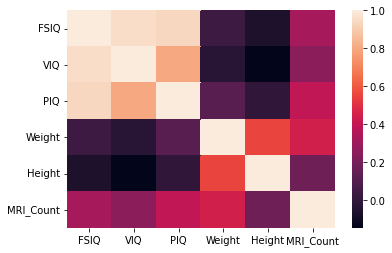

In [32]:
import seaborn as sns

wcorr = womenDf.corr()
sns.heatmap(wcorr)

<AxesSubplot:>

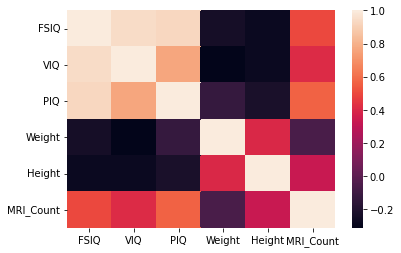

In [33]:
mcorr = menDf.corr()
sns.heatmap(mcorr)

<AxesSubplot:>

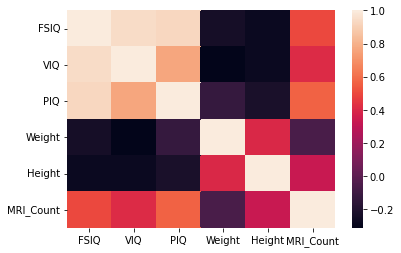

In [34]:
gcorr = df.corr()
sns.heatmap(mcorr)

<b> Observations:</b>

Many variable pairs present correlation close to zero. What does that mean?

The correlation coefficient r close to zero suggests weak or no correlation. The weak correlation suggests that brain size has little to do with how intelligent a person is.

Why separate the genders?

Because of body sizes (heights and weights), the separation was done to avoid skewing the results.

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.

Body height and body weight have strong correlation, as expected. Intellingence indices measured through tests also have strong correlation, as expected. Because the bigger the person, the bigger the head, consequently, the bigger the brain.

<h2>LAB 2: Simple Linear Regression</h2>

In [90]:
# Code Cell 6
# dependent variable for y axis
y = df['MRI_Count']
# independent variable for x axis
x = df.Height

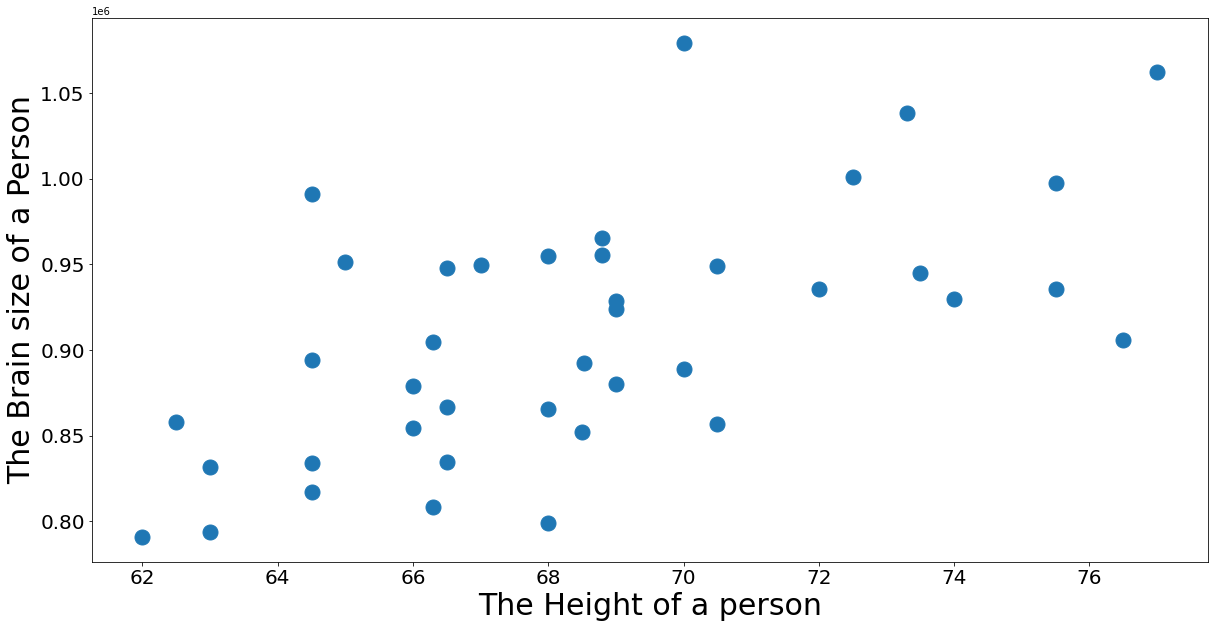

In [91]:
# Code Cell 7
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('The Brain size of a Person', fontsize = 30)
plt.xlabel('The Height of a person', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

<b> Calculate the slope and y-intercept of the linear regression line.</b>

In [92]:
# Code Cell 8
# Use numpy polyfit for linear regression to fit the data
# Generate the slope of the line (m)
# Generate the y-intercept (b)
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is 11022.73.
The y-intercept is 153415.25.
The best fit simple linear regression line is 11022.73x + 153415.25.


<b> Simple Linear Regression:</b> 

<b> MRI_Count = 11022.73(Height) + 153415.25 </b>

<h2> Calculate the centroid.</h2>

In [93]:
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 68.53 and y = 908755.00.


<h2> Overlay the regression line and the centroid point on the plot.</h2>

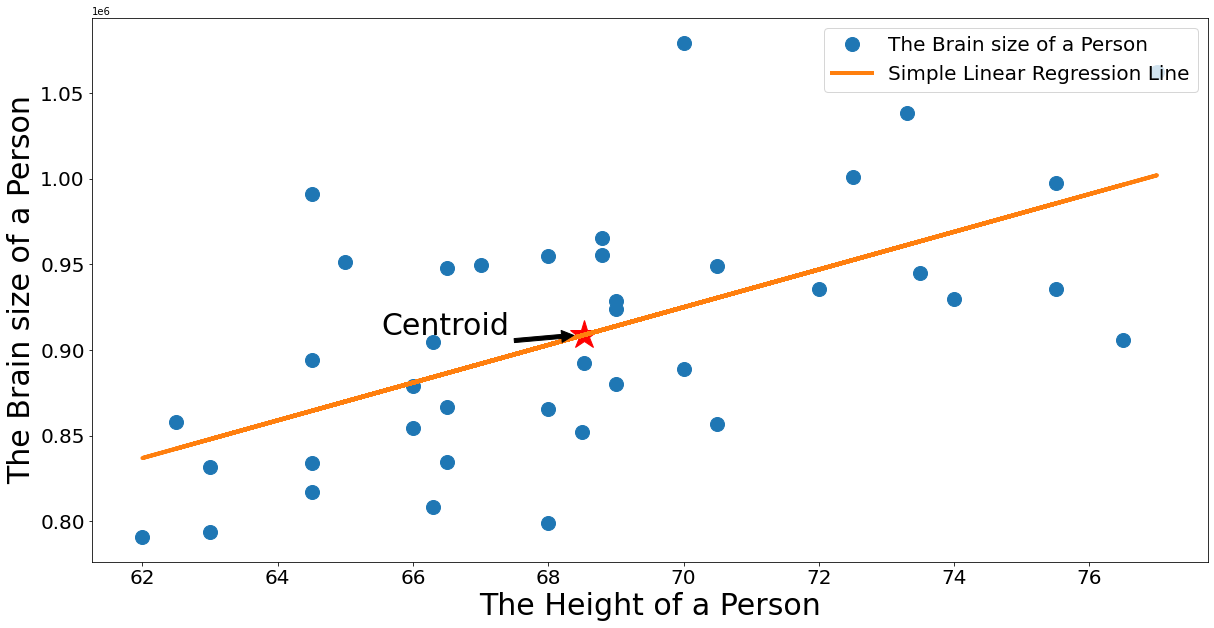

In [94]:
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "The Brain size of a Person") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('The Brain size of a Person', fontsize = 30)
plt.xlabel('The Height of a Person', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

<h2> 2nd Order and 3rd Order</h2>

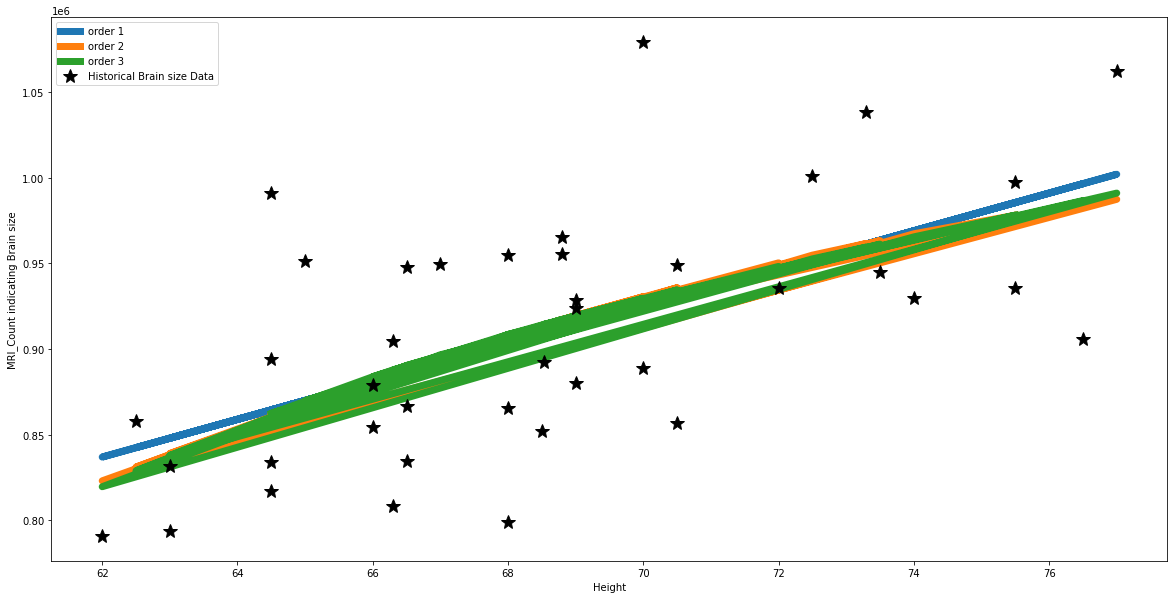

In [98]:
# Code cell 7
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Brain size Data', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Height')
plt.ylabel('MRI_Count indicating Brain size')

plt.show()

In [67]:
cdf = df[['MRI_Count','Height','Weight','FSIQ','VIQ','PIQ']]
cdf.head(9)

,MRI_Count,Height,Weight,FSIQ,VIQ,PIQ
0,816932.0,64.5,118.000000,133.0,132.0,124.0
1,1001121.0,72.5,151.052632,140.0,150.0,124.0
2,1038437.0,73.3,143.000000,139.0,123.0,150.0
3,965353.0,68.8,172.000000,133.0,129.0,128.0
4,951545.0,65.0,147.000000,137.0,132.0,134.0
5,928799.0,69.0,146.000000,99.0,90.0,110.0
6,991305.0,64.5,138.000000,138.0,136.0,131.0
7,854258.0,66.0,175.000000,92.0,90.0,98.0
8,904858.0,66.3,134.000000,89.0,93.0,84.0


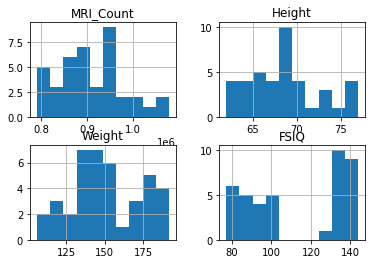

In [68]:
viz = cdf[['MRI_Count','Height','Weight','FSIQ']]
viz.hist()
plt.show()

In [69]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [74]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Height']])
train_y = np.asanyarray(train[['MRI_Count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[11379.26687814]]
Intercept:  [131807.30155983]


Text(0, 0.5, 'Brain Size')

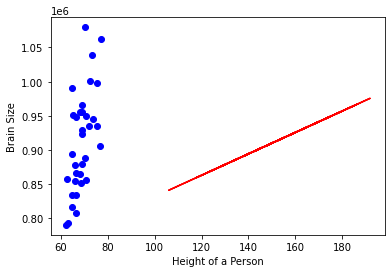

In [77]:
plt.scatter(train.Height, train.MRI_Count,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Height of a Person")
plt.ylabel("Brain Size")

Text(0, 0.5, 'Brain Size')

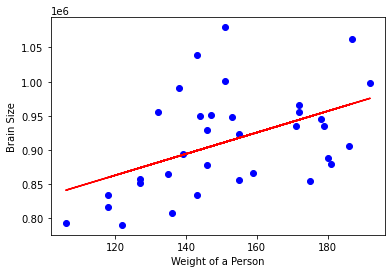

In [79]:
plt.scatter(train.Weight, train.MRI_Count,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Weight of a Person")
plt.ylabel("Brain Size")

In [80]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Weight']])
train_y = np.asanyarray(train[['MRI_Count']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1562.7280422]]
Intercept:  [675674.21003591]


In [81]:
from sklearn.metrics import r2_score
import numpy as np

test_x = np.asanyarray(test[['Weight']])
test_y = np.asanyarray(test[['MRI_Count']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 34101.38
Residual sum of squares (MSE): 1928601579.33
R2-score: -0.45


In [82]:
from sklearn.metrics import r2_score
import numpy as np

test_x = np.asanyarray(test[['Height']])
test_y = np.asanyarray(test[['MRI_Count']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 102910.65
Residual sum of squares (MSE): 13210918750.59
R2-score: -498.84


In [83]:
from sklearn.metrics import r2_score
import numpy as np

test_x = np.asanyarray(test[['Weight']])
test_y = np.asanyarray(test[['MRI_Count']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 34101.38
Residual sum of squares (MSE): 1928601579.33
R2-score: -0.45


<h2> What about Multiple Linear Regression</b>?

<h2> What about Polynomial Regression? </h2>

<h2> We want to use Multiple Linear Regression to come up with a better Model</h2>

In [84]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [85]:
x = np.asanyarray(train[['Height','Weight','PIQ']])# independent features
y = np.asanyarray(train[['MRI_Count']])# Dependent feature
regr.fit (x,y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9981.48093366  434.22637715 1458.85383543]]
Intercept:  [-4406.10057076]


<h2> Multiple Linear Regression Model is :</h2>

<h2> MRI_Count = 9981.48093366(Height)+ 434.22637715(Weight) + 1458.85383543(PIQ) - 4406.10057076</h2>

<h2> EVALUATION OF THE MODEL</h2>

In [86]:
y_hat= regr.predict(test[['Height','Weight','PIQ']])
x = np.asanyarray(test[['Height','Weight','PIQ']])
y = np.asanyarray(test[['MRI_Count']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % regr.score(x, y))

Residual sum of squares: 1510486538.76
R-squared: 0.47


<h2> Polynomial Regression</h2>